In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# 1. Create non-linear data distribution

In [2]:
# 임의의 클래스 A와 클래스 B를 생성함.
m = 200
class_A = np.random.normal(0, 1, [m, 2])
label_A = np.ones([m, 1])

class_B_x = np.random.normal(0, 2, [m, 1])
class_B_y = 0.5*class_B_x**2 - 3

class_B = np.concatenate([class_B_x, class_B_y], axis = 1)
label_B = np.zeros([m, 1])

In [3]:
#각 클래스의 데이터 shape은 다음과 같습니다. 
class_B.shape

(200, 2)

In [4]:
#레이블은 A가 1, B가 0입니다.
print(label_A[:5])
print(label_B[:5])

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


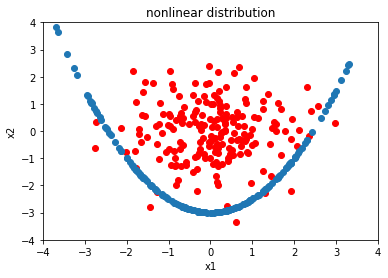

In [5]:
#데이터 분포를 볼까요?

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('nonlinear distribution')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])

ax1.scatter(class_A[:,0], class_A[:,1], c='red')

ax1.scatter(class_B[:,0], class_B[:,1])
plt.show()

In [6]:
#데이터를 통합해주겠습니다.
dataset = np.concatenate([class_A, class_B])
dataset.shape

(400, 2)

In [7]:
#레이블도 통합해줍니다.
label = np.concatenate([label_A, label_B])
label.shape

(400, 1)

# 2. Build your classification model with Neural Network

In [8]:
from tensorflow.keras import layers

def build_model():
  model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[2]),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[2]),
    layers.Dense(16, activation='relu'),
    layers.Dense(2, activation='relu'), #last hidden layer. data representation before decision makeing
    layers.Dense(1, activation='sigmoid')
  ])

In [9]:
model = build_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


# 3. Train your model

In [11]:
model.fit(dataset, label, epochs=500)

Epoch 1/500
13/13 [==============================] - 3s 5ms/step - loss: 0.6264 - accuracy: 0.5825
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5989 - accuracy: 0.6500
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.6775
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7275
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5345 - accuracy: 0.7525
Epoch 6/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5139 - accuracy: 0.7775
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.8075
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8675
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8825
Epoch 10/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8925
Epoch 11/

# 4. Observe your new representation of dataset transformed by network

In [18]:
last_hidden_output_model = tf.keras.Sequential() #create a new sequential model 
for layer in model.layers[:-1]:
  last_hidden_output_model.add(layer) # add each hidden layer
last_hidden_output_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 658
Trainable params: 658
Non-trainable params: 0
_________________________________________________________________


In [19]:
# 마지막 hidden layer에서 나오는 class A에 대한 새로운 데이터값들을 뽑아냅니다.
new_rep_A = last_hidden_output_model.predict(class_A)
new_rep_A.shape
# 마지막 hidden layer에서 나오는 class B에 대한 새로운 데이터값들을 뽑아냅니다.
new_rep_B = last_hidden_output_model.predict(class_B)
new_rep_B.shape

(200, 2)

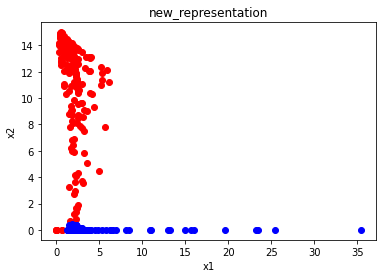

In [21]:
# 각각의 데이터들의 분포를 그려봅니다.

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_title('new_representation')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.scatter(new_rep_A[:,0], new_rep_A[:,1], c='red')

ax1.scatter(new_rep_B[:,0], new_rep_B[:,1], c='blue')
plt.show()